In [103]:
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv("ab_data.csv")
#Count number of people in control and treatment group
df[df['group'] == 'treatment']['group'].value_counts()
df[df['group'] =='control']['group'].value_counts()
#Deleting misaligned items
df = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) | ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
df['user_id'].nunique()
df.drop(1899, axis = 0, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [117]:
#H0: p_new - p_old <= 0
#H1: p_new - p_old > 0

#Probabilities of conversion with new and old pages
p_new = df[df['landing_page'] == 'new_page']['converted'].mean()
p_old = df[df['landing_page'] == 'old_page']['converted'].mean()
p_null = df['converted'].mean()
n_new = df[df['landing_page'] == 'new_page']['landing_page'].count()
n_old = df[df['landing_page'] == 'old_page']['landing_page'].count()

#Generating number of convertions under null hypothesis
bi_new_converted = np.random.binomial(n_new, p_null)
bi_old_converted = np.random.binomial(n_old, p_null)

#Differences between prop under H0
difference = bi_new_converted/n_new - bi_old_converted/n_old
simulated_diff = np.random.binomial(n_new, p_null, 10000)/n_new - np.random.binomial(n_old, p_null, 10000)/n_old

In [147]:
pe = (p_new - p_old)
p_pulled = (n_new*p_new + n_old*p_old)/(n_new+n_old)
z = pe/np.sqrt((p_pulled*(1-p_pulled)/n_new) + (p_pulled*(1-p_pulled)/n_old))

In [115]:
z

-1.3109241984234394

In [148]:
pe = (0.1298 - p_old)
z = pe/np.sqrt((p_pulled*(1-p_pulled)/n_new) + (p_pulled*(1-p_pulled)/n_old))

In [149]:
z

7.819247491313905

In [116]:
stats.norm(0, 1).cdf(z)

0.9050583127590245

In [127]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([p_new*n_new, p_old*n_old], [n_new, n_old], alternative='larger')




In [128]:
z_score

-1.3109241984234394

In [110]:
z

-1.3109241984234394

In [91]:
1 - (simulated_diff > (p_new - p_old)).mean()

0.1028

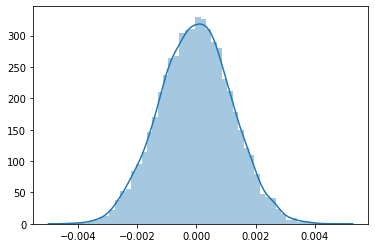

In [86]:
import seaborn as sb
b = sb.distplot(simulated_diff)

In [ ]:
bi_new